# The Facial Recognition Model 

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

#To get the machine to work 
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

def get_cnn(classes_path): 
    
    #Creating the convolutional neural network with layers and pretrained weights from imagenet
    cnn = VGG16(input_shape = (224, 224, 3) , weights='imagenet', include_top=False)
    
    #VGG16 is already trained via imagenet dataset, it already has capabilities of classifiying multiple objects
    #We must keep those, and make these weights non - trainable to preserve them 
    for i in cnn.layers: 
        i.trainable = False 
        
    #Adding the last layers in the cnn
    x = Flatten()(cnn.output)
    
    #To train the amount of people ('classes') and creating nodes for them 
    output = Dense(len(glob(classes_path)), activation='softmax')(x)
    
    #Now to create the model 
    model = Model(inputs = cnn.input, outputs = output)
    
    #Compiling model and telling it what optimizer and loss method to use
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

def model_generator(model, train_path, test_path): 
    
    #Generating training data: optimizing the images to create a better set of data to be trained on 
    train_data = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
    
    #Generating the test data 
    test_data = ImageDataGenerator(rescale = 1./255)
    
    #Generating training and testing sets 
    training_set = test_data.flow_from_directory(train_path, target_size = (224, 224), batch_size = 32, 
                                                 class_mode = 'categorical') 
    
    testing_set = test_data.flow_from_directory(test_path, target_size = (224, 224), batch_size = 32, 
                                                 class_mode = 'categorical')
    
    #Making the model 
    fit = model.fit_generator(training_set, validation_data = testing_set, epochs = 5, 
                              steps_per_epoch = len(training_set), validation_steps = len(testing_set))
    
    return fit

def results(fit): 
    
    #Showing the loss
    plt.plot(fit.history['loss'], label='train loss')
    plt.plot(fit.history['val_loss'], label='val loss')
    plt.legend()
    plt.show()

    #Showing the accuracies
    plt.plot(fit.history['accuracy'], label='train acc')
    plt.plot(fit.history['val_accuracy'], label='val acc')
    plt.legend()
    plt.show()
    

Using TensorFlow backend.


# Generating the Model 

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

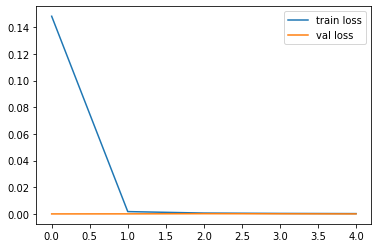

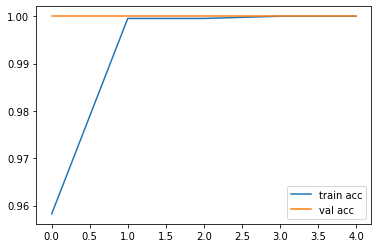

In [2]:
#Defining paths and directories
classes_path = '/users/diljot/Desktop/FaceID_Model/images/*'
train_path = '/users/diljot/Desktop/FaceID_Model/images'
test_path = '/users/diljot/Desktop/FaceID_Model/valid'

#Generating CNN 
face_recog_model = get_cnn(classes_path)
face_recog_model.summary()

#Generating and training model
model_fit = model_generator(face_recog_model, train_path, test_path) 

#Outputting results
results(model_fit)    

import tensorflow as tf
from keras.models import load_model

face_recog_model.save('face_recognition_model.h5')